In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Glass\Glass_AG_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	5
float64		column 2	0
float64		column 3	0
float64		column 4	10
float64		column 5	26
float64		column 6	10
float64		column 7	36
float64		column 8	5
float64		column 9	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,209.000000,214.000000,214.000000,204.000000,188.000000,204.000000,178.000000,209.000000,214.000000
mean,1.518359,13.407850,2.684533,1.437843,72.669628,0.504559,8.849045,0.165694,0.057009
std,0.003049,0.816604,1.442408,0.486786,0.731821,0.662510,1.216254,0.492777,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.890000,0.000000,5.430000,0.000000,0.000000
25%,1.516520,12.907500,2.115000,1.190000,72.327500,0.137500,8.247500,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.830000,0.560000,8.590000,0.000000,0.000000
75%,1.519160,13.825000,3.600000,1.630000,73.100000,0.610000,9.137500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.180000,6.210000,16.190000,3.150000,0.510000


<AxesSubplot:>

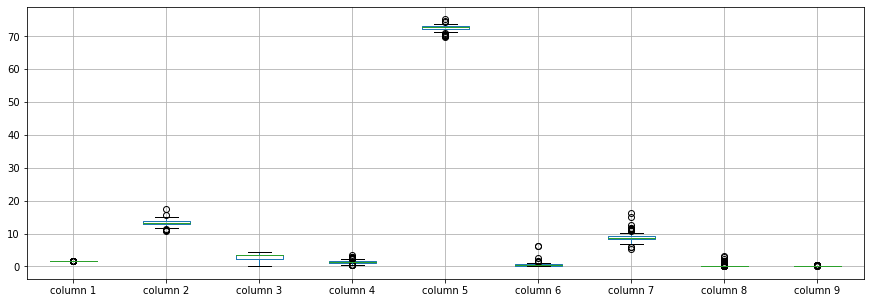

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.518359
column 2    13.407850
column 3     2.684533
column 4     1.437843
column 5    72.669628
column 6     0.504559
column 7     8.849045
column 8     0.165694
column 9     0.057009
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,-0.195711,-0.134234,-0.365713,-0.510848,-0.285854,0.767807,0.025240,0.140394
column 2,-0.195711,1.000000,-0.273732,0.157722,-0.263189,-0.265261,-0.165424,0.306514,-0.241346
column 3,-0.134234,-0.273732,1.000000,-0.466368,-0.263634,-0.018400,-0.383380,-0.479342,0.083060
column 4,-0.365713,0.157722,-0.466368,1.000000,0.090713,0.274488,-0.327695,0.490080,-0.057489
column 5,-0.510848,-0.263189,-0.263634,0.090713,1.000000,-0.102808,-0.127675,-0.034464,-0.064761
column 6,-0.285854,-0.265261,-0.018400,0.274488,-0.102808,1.000000,-0.340047,-0.025665,-0.014005
column 7,0.767807,-0.165424,-0.383380,-0.327695,-0.127675,-0.340047,1.000000,-0.217944,0.087240
column 8,0.025240,0.306514,-0.479342,0.490080,-0.034464,-0.025665,-0.217944,1.000000,-0.045859
column 9,0.140394,-0.241346,0.083060,-0.057489,-0.064761,-0.014005,0.087240,-0.045859,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+21,9+21+21,9+21+21+21,9+21+21+21+21,9+21+21+21+21+21,9+21+21+21+21+21+21,9+21+21+21+21+21,9+21+21+21+21,9+21+21+21,9+21+21,9+21,9], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 91.58869875394382
Epoch: 1 , loss: 91.58352367694562
Epoch: 2 , loss: 91.5214350773738
Epoch: 3 , loss: 91.96507615309496
Epoch: 4 , loss: 91.90806696965144
Epoch: 5 , loss: 91.52928983248196
Epoch: 6 , loss: 91.5431418785682
Epoch: 7 , loss: 91.85895303579477
Epoch: 8 , loss: 91.47757310133714
Epoch: 9 , loss: 91.46949650691106
Epoch: 10 , loss: 92.15072279710036
Epoch: 11 , loss: 92.2411146897536
Epoch: 12 , loss: 91.88807384784405
Epoch: 13 , loss: 91.4450941819411
Epoch: 14 , loss: 91.78368260310246
Epoch: 15 , loss: 91.83126302865836
Epoch: 16 , loss: 91.83363753098708
Epoch: 17 , loss: 91.48468369704027
Epoch: 18 , loss: 91.48366429255559
Epoch: 19 , loss: 91.7829595712515
Epoch: 20 , loss: 91.49964317908653
Epoch: 21 , loss: 91.8673107440655
Epoch: 22 , loss: 92.2610573401818
Epoch: 23 , loss: 91.44225193903996
Epoch: 24 , loss: 91.45242133507362
Epoch: 25 , loss: 91.4267807006836
Epoch: 26 , los

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(214, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     1.51966
column 2    14.77000
column 3     3.75000
column 4     0.29000
column 5    72.02000
column 6     0.03000
column 7     9.00000
column 8     0.00000
column 9     0.00000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Glass.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(296.5475621920511, 1090.4359815890969)

In [17]:
NRMS=numerator/denominator
NRMS


0.27195320697313297

In [18]:
new_df.iloc[66,:]

column 1     1.521520
column 2    13.050000
column 3     3.650000
column 4     1.352632
column 5    16.543722
column 6     0.190000
column 7     9.850000
column 8     0.000000
column 9     0.170000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [20]:
imputations[-1].to_excel("Glass_AG_5(imp).xlsx", index=False, header=False)